In [1]:
from dynamics import *
from planning import *

In [2]:
mp = 0.1
mc = 1.0
l = 1.0
dt = 0.05

cart = CartPole(mp = mp,
               mc = mc,
               l = l,
               dt = dt)

print(cart)

╔═══════════════════════════════════════════════╗
║            CartPole Dynamics Model            ║
╚═══════════════════════════════════════════════╝
║ Mass Pole:               0.100          kg    ║
║ Mass Cart:               1.000          kg    ║
║ Pendulum Length:         1.000          m     ║
║ Gravity:                 9.807          m/s²  ║
║ Time Step:               0.050          s     ║
─────────────────────────────────────────────────



In [3]:
N = 250

x0 = np.array([0, 0, np.sin(np.pi), np.cos(np.pi), 0])
xg = np.array([0, 0, np.sin(0), np.cos(0), 0])

u0 = np.array([0])

Q = 10*np.eye(5)
Q[1,1] = Q[4,4] = 0
R = 0.01*np.eye(1)

Qtf = 1*np.eye(5)

l = lambda x, u, xg: (x - xg).T@Q@(x-xg) + u.T@R@u
lf = lambda x, u, xg: (x - xg).T@Qtf@(x-xg)

ddp = DDP(
    dynamics = cart,
    l_func = l,
    lf_func = lf,
)

print(ddp)

In [4]:
ddp.build_symbolic_gradients()
x, u = ddp.run(x0, u0, xg, N, max_iter=300)

╔═══════════════════════════════════════════════╗
║             Starting DDP Algorithm            ║
╚═══════════════════════════════════════════════╝
╔═══════════════════════════════════════════════╗
║ Itr:    1/300   J: 9992.405097   α: 4.438E-04 ║
╚═══════════════════════════════════════════════╝
╔═══════════════════════════════════════════════╗
║ Itr:    2/300   J: 9793.236575   α: 4.438E-04 ║
╚═══════════════════════════════════════════════╝
╔═══════════════════════════════════════════════╗
║ Itr:    3/300   J: 8709.100350   α: 4.438E-04 ║
╚═══════════════════════════════════════════════╝
╔═══════════════════════════════════════════════╗
║ Itr:    4/300   J: 8402.076662   α: 4.438E-04 ║
╚═══════════════════════════════════════════════╝
╔═══════════════════════════════════════════════╗
║ Itr:    5/300   J: 8225.597382   α: 4.438E-04 ║
╚═══════════════════════════════════════════════╝
╔═══════════════════════════════════════════════╗
║ Itr:    6/300   J: 8108.827621   α: 4.438E-04 ║


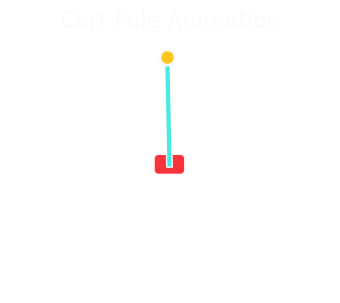

In [5]:
cart.animate(x, u, dt)

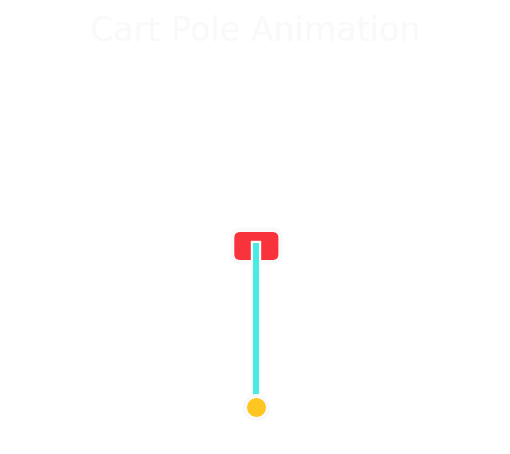

In [6]:
from IPython.display import Image

Image(filename='cartpole.gif')